# 1) Generic Section

In [ ]:
#Mounting
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import time
from keras.models import Sequential #LSTM
from keras.layers import LSTM #LSTM
from keras.layers.core import Dense #LSTM
from numpy import nan #Univariate LSTM
from tensorflow.keras import Sequential #Univariate LSTM
from tensorflow.keras.layers import LSTM, Dense #Univariate LSTM
from sklearn.metrics import mean_squared_error #Univariate LSTM
from sklearn.preprocessing import MinMaxScaler #Univariate LSTM
from numpy import array #Multivariate LSTM
from numpy import hstack #Multivariate LSTM
import tensorflow as tf #Multivariate LSTM
from sklearn.tree import export_graphviz # Import tools needed for visualization
import pydot # Import tools needed for visualization
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import pprint
import calendar
import time
import datetime
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
%cd /content/gdrive/MyDrive/Drishya.ai IIMB Electricity Price Forecast Project/5. Model/Load Forecast/Model Linked Data/27_Feb_2021
os.getcwd()

/content/gdrive/.shortcut-targets-by-id/1AYwSs_xHAFLs8FgbVfeeEFEfZQ3-l5Bs/Drishya.ai IIMB Electricity Price Forecast Project/5. Model/Load Forecast/Model Linked Data/27_Feb_2021


'/content/gdrive/.shortcut-targets-by-id/1AYwSs_xHAFLs8FgbVfeeEFEfZQ3-l5Bs/Drishya.ai IIMB Electricity Price Forecast Project/5. Model/Load Forecast/Model Linked Data/27_Feb_2021'

# Price Forecasting

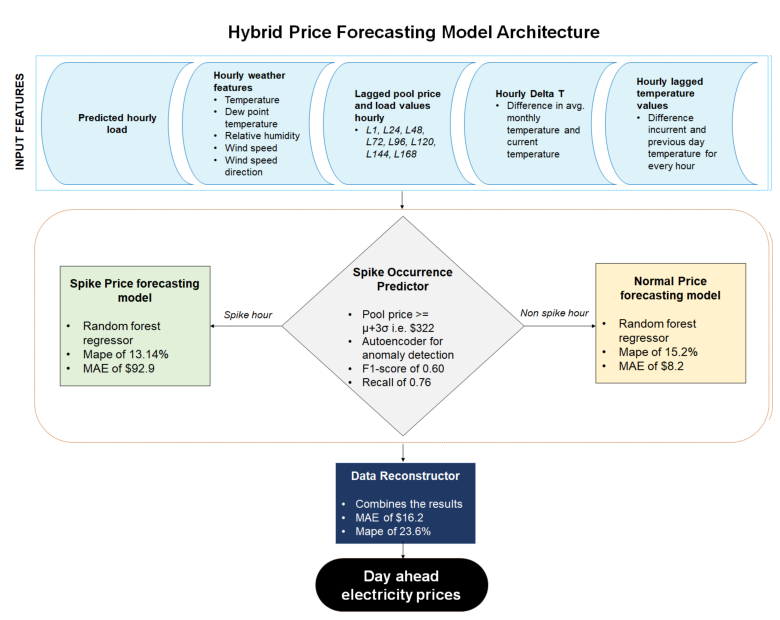

In [211]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
figure(figsize=(13, 10), dpi=80)
img = mpimg.imread('hybrid_price_forecasting_model.png')
plt.axis('off')
plt.imshow(img)

# Master dataset preparation 

In [2]:
price_load_data= pd.read_csv('load2015.csv')
price_load_data['date_time'] = pd.to_datetime(price_load_data['date_time'])
price_load_data=price_load_data.drop(['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8'], axis=1)
#price_data_2021=pd.read_excel('price_data_2021.xlsx')
#price_2021=price_load_data.append(price_data_2021)
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.01, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.02, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.49, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.60, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.62, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.90, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.67, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.68, np.nan) #removing outliers
price_load_data['ACTUAL_POOL_PRICE'] = price_load_data['ACTUAL_POOL_PRICE'].replace(0.91, np.nan) #removing outliers
price_load_data=price_load_data.dropna()

#reading weather data 
temp=pd.read_csv('temp_alberta_final_2021.csv')
temp['date_time'] = pd.to_datetime(temp['date_time'])

#merge weather features 
price_load_temp_data=pd.merge(price_load_data, temp, on='date_time', how='left')

#creating lags in the master price data 
price_load_temp_data['lag_hr_1']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(1)
price_load_temp_data['lag_hr_2']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(2)
price_load_temp_data['lag_hr_3']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(3)
price_load_temp_data['lag_hr_4']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(4)
price_load_temp_data['lag_hr_5']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(5)
price_load_temp_data['lag_hr_6']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(6)
price_load_temp_data['lag_hr_7']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(7)
price_load_temp_data['lag_hr_8']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(8)
price_load_temp_data['lag_hr_9']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(9)
price_load_temp_data['lag_hr_10']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(10)
price_load_temp_data['lag_hr_11']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(11)
price_load_temp_data['lag_hr_12']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(12)
price_load_temp_data['lag_hr_13']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(13)
price_load_temp_data['lag_hr_14']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(14)
price_load_temp_data['lag_hr_15']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(15)
price_load_temp_data['lag_hr_16']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(16)
price_load_temp_data['lag_hr_17']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(17)
price_load_temp_data['lag_hr_18']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(18)
price_load_temp_data['lag_hr_19']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(19)
price_load_temp_data['lag_hr_20']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(20)
price_load_temp_data['lag_hr_21']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(21)
price_load_temp_data['lag_hr_22']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(22)
price_load_temp_data['lag_hr_23']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(23)
price_load_temp_data['lag_hr_24']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(24)
price_load_temp_data['lag_hr_48']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(48)
price_load_temp_data['lag_hr_72']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(72)
price_load_temp_data['lag_hr_96']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(96)
price_load_temp_data['lag_hr_120']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(120)
price_load_temp_data['lag_hr_144']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(144)
price_load_temp_data['lag_hr_168']=price_load_temp_data['ACTUAL_POOL_PRICE'].shift(168)

#creating load lags in the master price data 
price_load_temp_data['lag_l_24']=price_load_temp_data['load'].shift(24)
price_load_temp_data['lag_l_48']=price_load_temp_data['load'].shift(48)
price_load_temp_data['lag_l_72']=price_load_temp_data['load'].shift(72)
price_load_temp_data['lag_l_96']=price_load_temp_data['load'].shift(96)
price_load_temp_data['lag_l_120']=price_load_temp_data['load'].shift(120)
price_load_temp_data['lag_l_144']=price_load_temp_data['load'].shift(144)
price_load_temp_data['lag_l_168']=price_load_temp_data['load'].shift(168)

#creating difference in temp lag
price_load_temp_data['lag_t_24']=price_load_temp_data['temp_c'].shift(24)
price_load_temp_data['temp_lag']=price_load_temp_data['temp_c']-price_load_temp_data['lag_t_24']

#creating delta temp feature
temp_m=[-8.5,-9,-3,4.5,12,16.5,18.5,17.5,12,5,-4,-9]
temp_m = DataFrame(temp_m,columns=['avg_temp'])
temp_m.reset_index(level=0, inplace=True)
month=[1,2,3,4,5,6,7,8,9,10,11,12]
month = DataFrame(month,columns=['month'])
month.reset_index(level=0, inplace=True)

temp_month=pd.merge(month,temp_m, on="index", how='inner')
temp_month=temp_month.drop(['index'],axis=1)

#merging with the master data 
price_load_temp_data=pd.merge(price_load_temp_data, temp_month, on="month", how='left')
#creating delta temp
price_load_temp_data['delta_temp']=price_load_temp_data['temp_c']-price_load_temp_data['avg_temp']

#defining a spike - Mu+3sigma 
price_load_temp_data.loc[(price_load_temp_data.ACTUAL_POOL_PRICE >= 322), "spike_flag"] = 1
price_load_temp_data['spike_flag']=price_load_temp_data['spike_flag'].fillna(0)
price_load_temp_data=price_load_temp_data.drop(['avg_temp'],axis=1)

price_master_data=price_load_temp_data.dropna()

price_master_data = price_master_data[(price_master_data['year'] != 2016)]
price_master_data = price_master_data[(price_master_data['year'] != 2017)]

price_master_data.shape

(37346, 55)

In [36]:
print(price_master_data.ACTUAL_POOL_PRICE.mean())
print(price_master_data.ACTUAL_POOL_PRICE.std())
print(price_master_data.ACTUAL_POOL_PRICE.mean()+(3*price_master_data.ACTUAL_POOL_PRICE.std()))

49.80902238526147
94.90931495789093
334.5369672589342


# EDA

In [9]:
print(price_master_data.groupby('year')['ACTUAL_POOL_PRICE'].mean())
print(price_master_data.groupby('year')['ACTUAL_POOL_PRICE'].std())

year
2015    33.115286
2016    18.286918
2017    22.353835
2018    50.337740
2019    54.880458
2020    46.977874
2021    96.194834
Name: ACTUAL_POOL_PRICE, dtype: float64
year
2015     86.431609
2016     12.623526
2017     26.992745
2018     87.197581
2019     90.394649
2020     92.323403
2021    142.224024
Name: ACTUAL_POOL_PRICE, dtype: float64


<AxesSubplot:xlabel='year', ylabel='Price ($)'>

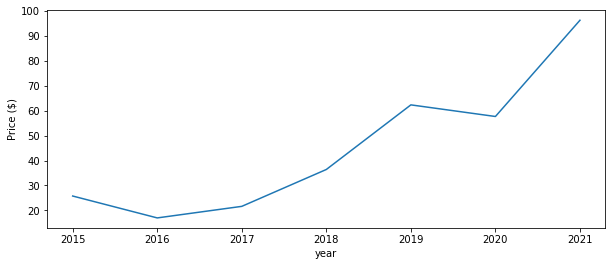

In [4]:
price_jan=price_master_data[(price_master_data['month'] == 1)]
price_feb=price_master_data[(price_master_data['month'] == 2)]
price_mar=price_master_data[(price_master_data['month'] == 3)]
price_apr=price_master_data[(price_master_data['month'] == 4)]
price_months=price_jan.append([price_feb,price_mar,price_apr])


a=price_months.groupby('year')['ACTUAL_POOL_PRICE'].mean()
import matplotlib.pyplot as plt
  
# creating a dictionary
font = {'size': 10}
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4  
# using rc function
plt.rc('font', **font)
plt.xlabel('Year'); plt.ylabel('Price ($)')
a.plot.line()


In [7]:
price_master_data.groupby('ACTUAL_POOL_PRICE') ['date_time'].count()

ACTUAL_POOL_PRICE
1.12       1
1.27       1
1.28       1
1.32       1
1.42       1
          ..
999.58     1
999.60     1
999.65     1
999.94     1
999.99    10
Name: date_time, Length: 7495, dtype: int64

In [210]:
pd.crosstab(price_master_data.year,price_master_data.spike_flag)

spike_flag,0.0,1.0
year,,
2015,8468,120
2018,8550,146
2019,8586,174
2020,8588,147
2021,2355,212


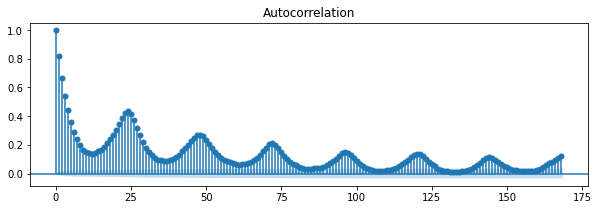

In [76]:
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 3
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(price_master_data['ACTUAL_POOL_PRICE'],lags=168)
pyplot.show()

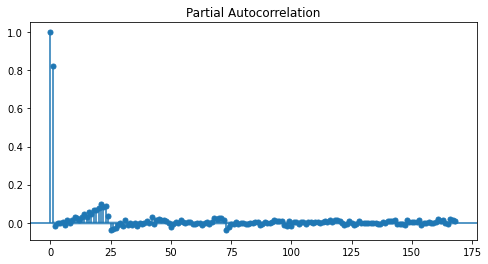

In [62]:
plot_pacf(price_master_data['ACTUAL_POOL_PRICE'],lags=168)
pyplot.show()

Text(0, 0.5, 'Price ($)')

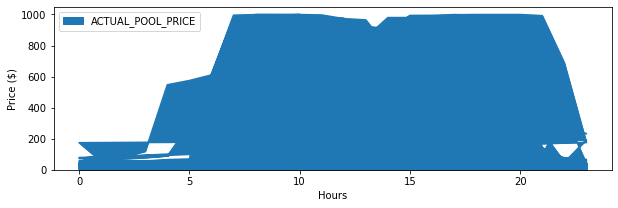

In [56]:
price_master_data1 = price_master_data[(price_master_data['year'] == 2020)]
price_master_data2 = price_master_data1[['ACTUAL_POOL_PRICE','hour']]
price_master_data2.set_index('hour',inplace = True)

price_master_data2.plot.area(figsize=(10,3))
plt.xlabel('Hours'); plt.ylabel('Price ($)')

In [36]:
on_peak = price_master_data[(price_master_data['hour'] >= 6) & (price_master_data['hour'] <=22)]
off_peak = price_master_data[(price_master_data['hour'] >= 0) & (price_master_data['hour'] <=5)] 
off_peak_23=price_master_data[(price_master_data == 23)]
off_peak_total=off_peak.append(off_peak_23)
print(on_peak.ACTUAL_POOL_PRICE.mean())
print(off_peak_total.ACTUAL_POOL_PRICE.mean())

46.38635092409322
25.214074780058546


In [117]:
print(price_master_data6.mean(),price_master_data7.mean())


ACTUAL_POOL_PRICE    72.885645
dtype: float64 temp_c   -6.282244
dtype: float64


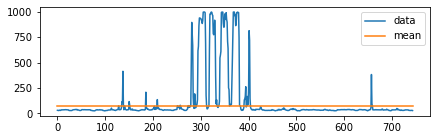

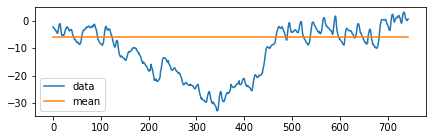

In [52]:
price_master_data5 = price_master_data1[(price_master_data['month'] == 1)]
price_master_data6=price_master_data5[['ACTUAL_POOL_PRICE']]
price_master_data7=price_master_data5[['temp_c']]
price_master_data10 = pd.DataFrame({
      'data': price_master_data6.ACTUAL_POOL_PRICE.values.tolist(),
      'mean': [72.88 for i in range(len(price_master_data6[['ACTUAL_POOL_PRICE']]))]})

price_master_data11 = pd.DataFrame({
      'data': price_master_data7.temp_c.values.tolist(),
      'mean': [-6 for i in range(len(price_master_data7[['temp_c']]))]})

from pylab import rcParams
rcParams['figure.figsize'] = 7, 2

price_master_data10.plot()

price_master_data11.plot()

plt.show()

<AxesSubplot:xlabel='hour'>

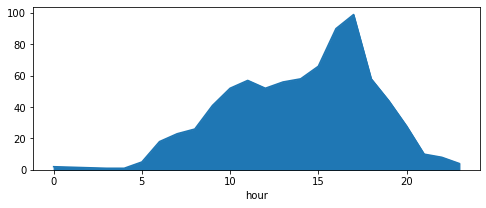

In [122]:
price_master_data14 = price_master_data[(price_master_data['year'] == 2020)]
price_master_data15 = price_master_data[(price_master_data['spike_flag'] == 1)]
a=price_master_data15.groupby('hour')['spike_flag'].count()
a.plot.area()

In [5]:
tsd = price_master_data[(price_master_data['year'] == 2020)]
series_index = tsd[['ACTUAL_POOL_PRICE','date_time']]
series_index.set_index('date_time', inplace=True)


In [6]:
series=pd.DataFrame(series_index)

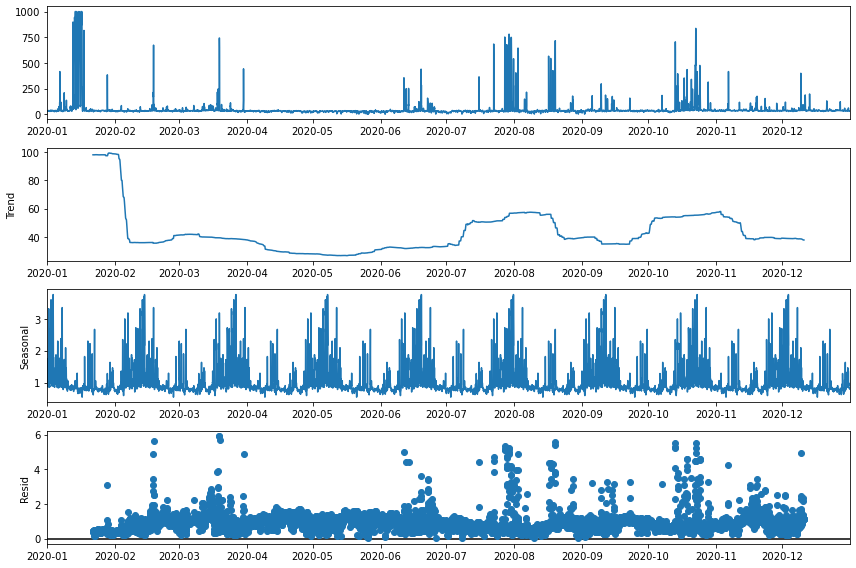

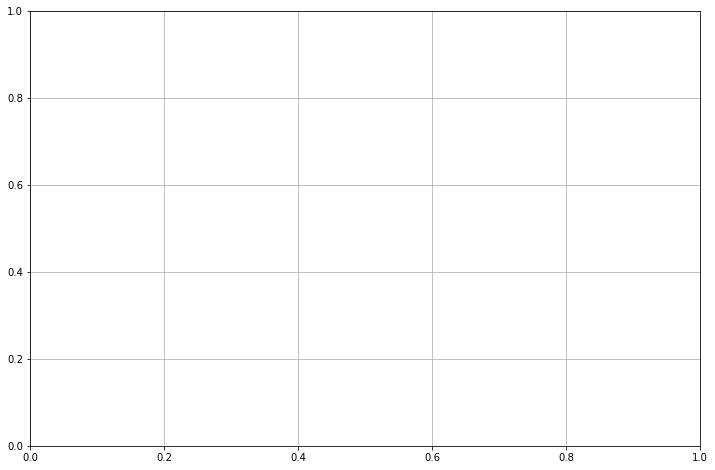

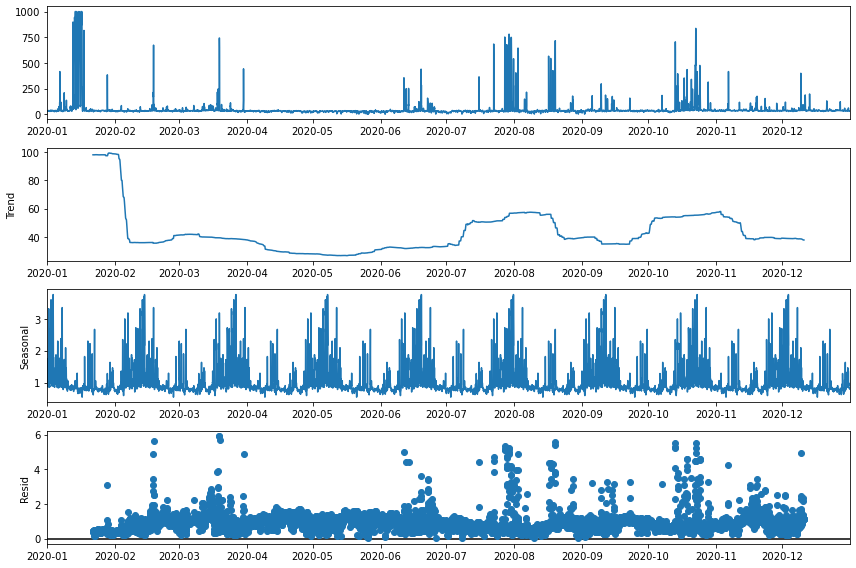

In [7]:

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
plt.grid('off')
result = seasonal_decompose(series, model='multiplicative', period =1000)
result.plot()

# IID Assumption validation 

By sequential sampling of a process we mean
acquiring data ordered with respect to time and/or space. The usual engineering application
in which this occurs is process control. A typical science scenario is acquiring data using
instruments which drift over time. To check that process data are IID we first check that
the data are ID (identically distributed) by checking that the distribution of the data is not
changing over time or space, i.e., that the data generating process is stationary. We do this
by plotting the observations in the order collected. Such a graph is called a time series
plot or run chart. You can create a time series plot using the Minitab macro tsplot. If
the data are ID then the time series plot should consist of points which
1. appear randomly scattered vertically about the center (sample median) of the data (depicted by a horizontal line), that is, the points do not exhibit an increasing, decreasing,
or otherwise systematic trend about the center over time, and
2. appear to have a constant degree of vertical dispersion or scatter, that is, the amount
of variability does not exhibit an increasing, decreasing, or otherwise systematic trend
over time.

If the data appear appear to be ID, then we check that the data are I (independent) using
a lag plot. You can create a lag plot using the Minitab macro lagplot. Usually lack of
independence in process data is due to positive autocorrelation in which adjacent observations
are similar in value. We check for autocorrelation by constructing a lag plot of the data. A
lag plot is a scatter plot of the points (xi−1, xi) for i = 2, 3, . . . , n. If these points tend to fall
on a line or curve, then adjacent observations tend to obey a relationship and are hence not
independent. If the observations are positively autocorrelated, then the points tend to fall
on a line with positive slope. If they are negatively autocorrelated, then the points tend to
fall on a line with a negative slope. If the points are independent and therefore uncorrelated,
the points should be randomly distributed in the x-y plane.


In [240]:
price_master_data_iid1.ACTUAL_POOL_PRICE.mean()

96.19483443708623

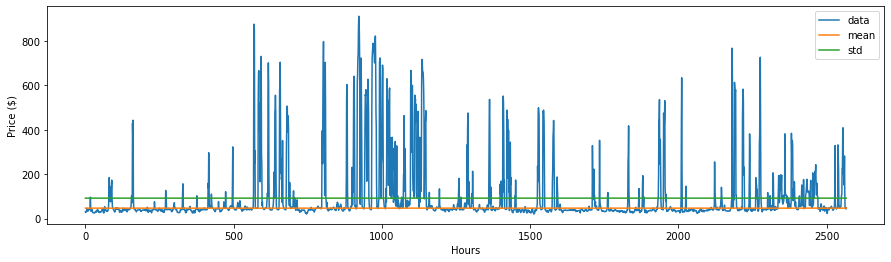

In [20]:
price_master_data_iid1 = price_master_data[(price_master_data['year'] == 2021)]
df = pd.DataFrame({
      'data': price_master_data_iid1.ACTUAL_POOL_PRICE.values.tolist(),
      'mean': [46.9 for i in range(len(price_master_data_iid1[['ACTUAL_POOL_PRICE']]))],
      'std': [92 for i in range(len(price_master_data_iid1[['ACTUAL_POOL_PRICE']]))]})


from pylab import rcParams

rcParams['figure.figsize'] = 15, 4

df.plot()
import matplotlib.pyplot as plt
  
# creating a dictionary
font = {'size': 10}
plt.xlabel('Hours'); plt.ylabel('Price ($)');
plt.show()


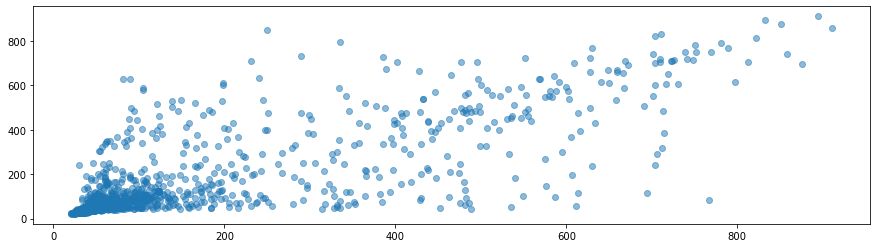

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
#price_master_data_iid2=price_master_data_iid1[(price_master_data_iid1['month'] == 2)]
data = price_master_data_iid1[['ACTUAL_POOL_PRICE','lag_hr_1']]

from pylab import rcParams
rcParams['figure.figsize'] = 15, 4
N = 50
x = data['ACTUAL_POOL_PRICE']
y = data['lag_hr_1']
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y,  alpha=0.5)
plt.show()

# Train, test and validation split

In [68]:
#defining the test,train,val dataset 
price_master_data_main=price_master_data.loc[(price_master_data['date_time'] >= '2015-01-08 00:00:00') & (price_master_data['date_time'] < '2021-04-10 00:00:00')]

#separating the validation set 
price_master_data_val=price_master_data.loc[(price_master_data['date_time'] >= '2021-04-10 00:00:00')]
print(price_master_data_main.shape, price_master_data_val.shape)

(37082, 55) (264, 55)


In [69]:
from sklearn.model_selection import train_test_split
train_test_ratio = 0.80
val_ratio = 0.20
# train and validation set is now 90% of the entire data set
train_test, val  = train_test_split(price_master_data_main, test_size=1 - train_test_ratio)

print(train_test.shape, val.shape)

(29665, 55) (7417, 55)


## Baseline Price Forecasting model - Exponential Smoothing 

In [226]:
def simple_exp_smooth(d,extra_periods=24,alpha=0.4):  
  d = np.array(d)  # Transform the input into a numpy array  
  cols = len(d)  # Historical period length  
  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
  f = np.full(cols+extra_periods,np.nan)  # Forecast array  
  f[1] = d[0]  # initialization of first forecast  
  # Create all the t+1 forecasts until end of historical period  
  for t in range(2,cols+1):  
    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
  f[cols+1:] = f[t]  # Forecast for all extra periods  
  df = pd.DataFrame.from_dict({"Price":d,"Forecast":f,"Error":abs(d-f),"Mape":(abs(d-f))/d})  
  return df  

exp=train_test['ACTUAL_POOL_PRICE'].values.tolist()
df = simple_exp_smooth(exp,extra_periods=24)
df=df.dropna()

MAE = df["Error"].abs().mean()  
print("MAE:","$",round(MAE,2)) 
MAPE = df['Mape'].mean()
print("MAPE:",100*round(MAPE,2),"%") 

MAE: $ 39.31
MAPE: 90.0 %


<AxesSubplot:title={'center':'Simple Smoothing'}, xlabel='Periods'>

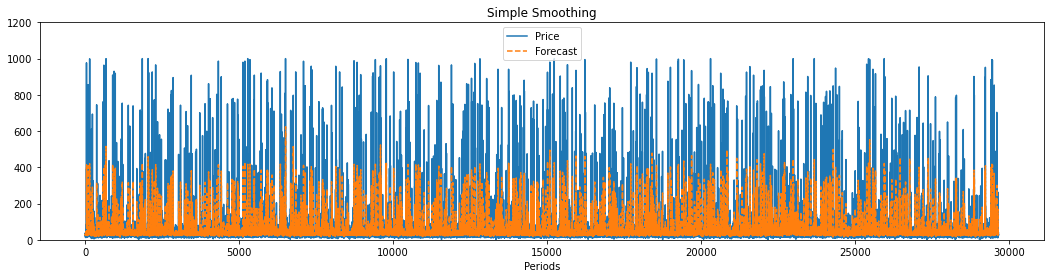

In [146]:
df.index.name = "Periods"
df[["Price","Forecast"]].plot(figsize=(18,4),title="Simple Smoothing",ylim=(0,1200),style=["-","--"]) 

# Model Building 

# Spike Occurence Predictor  

In [70]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import tensorflow as tf

import seaborn as sns
from pylab import rcParams

from sklearn.model_selection import train_test_split

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 7, 4
RANDOM_SEED = 42


In [71]:
#defining the classification data
spike_price_data=train_test[['load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168',  'lag_t_24', 'temp_lag',
       'delta_temp', 'spike_flag']]

spike_price_data=train_test.set_index('date_time')

#defining normal and spike datasets
spike = spike_price_data[spike_price_data.spike_flag == 1]
normal = spike_price_data[spike_price_data.spike_flag == 0]

spike.shape
normal.shape

(29046, 54)

<Figure size 864x576 with 0 Axes>

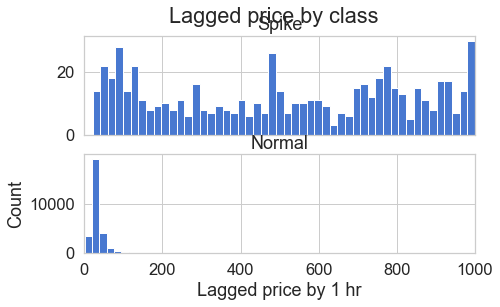

In [73]:
# Distribution of spike/normal hours 

spike['lag_hr_1'].describe()
normal['lag_hr_1'].describe()

plt.figure(figsize=(12,8))
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Lagged price by class')

bins = 50

ax1.hist(spike['lag_hr_1'], bins = bins)
ax1.set_title('Spike')

ax2.hist(normal['lag_hr_1'], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Lagged price by 1 hr')
plt.ylabel('Count')
plt.xlim((0,1000))
#plt.yscale('log')

plt.show();

In [155]:
from sklearn.preprocessing import StandardScaler
spike_price_data['lag_hr_1'] = StandardScaler().fit_transform(spike_price_data['lag_hr_1'].values.reshape(-1, 1))

spike_price_data_final=spike_price_data[['lag_hr_1', 'spike_flag']]

In [156]:
X_train, X_test = train_test_split(spike_price_data_final, test_size=0.2, random_state=RANDOM_SEED)

# Setting up X_train, removing the 'Class variable' 
# We wont be using fraud cases.
X_train = X_train[X_train.spike_flag == 0]
X_train = X_train.drop(['spike_flag'], axis=1)

# For testing
y_test = X_test['spike_flag']
X_test = X_test.drop(['spike_flag'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(23220, 1)

In [157]:
input_dim = X_train.shape[1]   
encoding_dim = 1

input_layer = Input(shape=(input_dim, ))  #29

encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(encoding_dim, activation='tanh')(encoder)

decoder = Dense(input_dim)(decoder)   #29

autoencoder = Model(inputs=input_layer, outputs=decoder)

nb_epoch = 20
batch_size = 32

autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])

autoencoder.fit(X_train, X_train,       
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1)

Epoch 1/20
726/726 [==============================] - 2s 2ms/step - loss: 0.3136 - accuracy: 0.0000e+00 - val_loss: 1.0408 - val_accuracy: 0.0000e+00
Epoch 2/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.0000e+00 - val_loss: 1.0397 - val_accuracy: 0.0000e+00
Epoch 3/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2517 - accuracy: 0.0000e+00 - val_loss: 1.0383 - val_accuracy: 0.0000e+00
Epoch 4/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2754 - accuracy: 0.0000e+00 - val_loss: 1.0373 - val_accuracy: 0.0000e+00
Epoch 5/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2395 - accuracy: 0.0000e+00 - val_loss: 1.0375 - val_accuracy: 0.0000e+00
Epoch 6/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2737 - accuracy: 0.0000e+00 - val_loss: 1.0400 - val_accuracy: 0.0000e+00
Epoch 7/20
726/726 [==============================] - 1s 2ms/step - loss: 0.2827 - accuracy: 0.0000e

In [158]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,5.933000e+03,5933.000000
mean,1.039738e+00,0.023091
std,7.845205e+00,0.150206
min,1.197581e-08,0.000000
25%,3.818214e-03,0.000000
50%,1.075845e-02,0.000000
75%,3.875876e-02,0.000000
max,1.029733e+02,1.000000


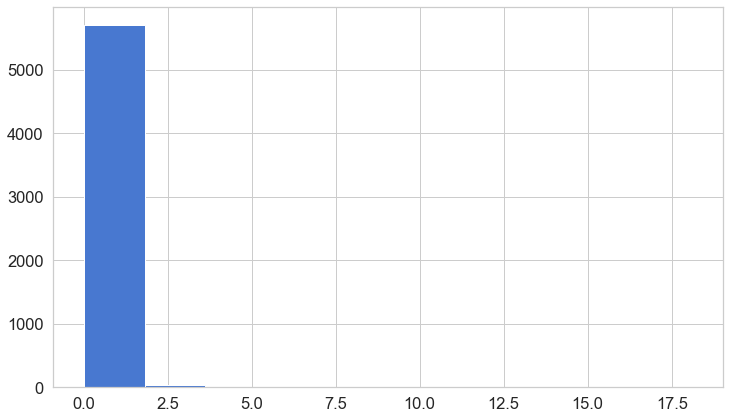

In [159]:
# Reconstruction error without fraud

fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 20)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

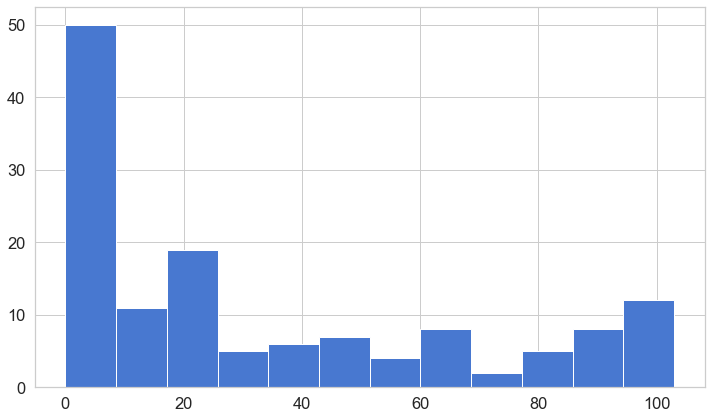

In [160]:
# Reconstruction error with fraud

fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=12)

In [161]:
threshold = 2.4

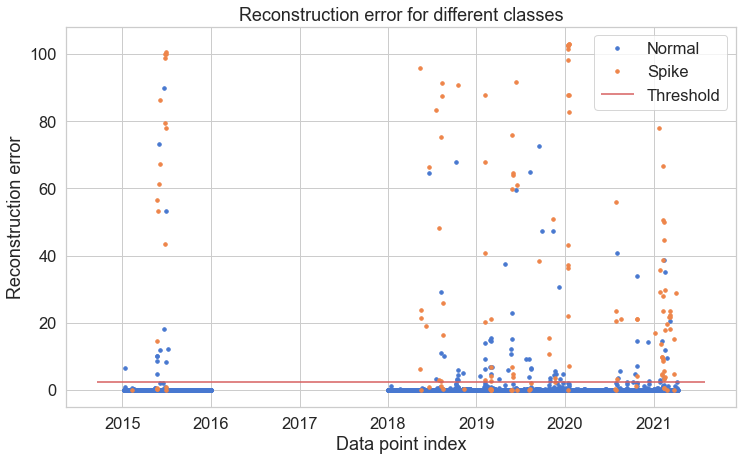

In [162]:
groups = error_df.groupby('true_class')

fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Spike" if name == 1 else "Normal")
    
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [163]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]

In [164]:
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
print("Classification report - \n", classification_report(error_df.true_class,y_pred))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      5796
         1.0       0.58      0.78      0.67       137

    accuracy                           0.98      5933
   macro avg       0.79      0.88      0.83      5933
weighted avg       0.99      0.98      0.98      5933



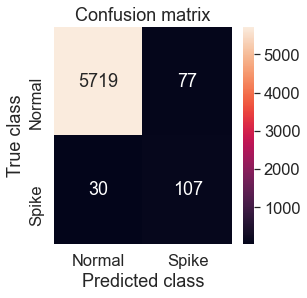

In [165]:
from sklearn.metrics import confusion_matrix
LABELS = ["Normal", "Spike"]                             
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True , fmt="d");
                             
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Normal price forecasting


In [74]:
#working on train test data 
normal_price_data = train_test[train_test.spike_flag == 0] 
normal_price_data.columns

Index(['date_time', 'date', 'hour', 'ACTUAL_POOL_PRICE', 'load', 'date_time1',
       'year', 'month', 'day', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24', 'temp_lag',
       'delta_temp', 'spike_flag'],
      dtype='object')

In [75]:
x = normal_price_data[[ 'load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24', 
       'delta_temp']]
y=normal_price_data['ACTUAL_POOL_PRICE']

#standardise the data
from sklearn import preprocessing
names=x.columns
scaler=preprocessing.StandardScaler()
x_s=scaler.fit_transform(x)
x_s=pd.DataFrame(x_s,index=normal_price_data.index,columns=names)

In [76]:
x_train_npf, x_test_npf, y_train_npf, y_test_npf = train_test_split(x_s,y, test_size=0.20, random_state=42)
print(x_train_npf.shape, x_test_npf.shape, y_train_npf.shape, y_test_npf.shape) 

(23236, 45) (5810, 45) (23236,) (5810,)


In [77]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(x_train_npf, y_train_npf);

In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 150, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,             
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
               
print(random_grid)

{'n_estimators': [80, 87, 95, 103, 111, 118, 126, 134, 142, 150], 'max_depth': [20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_npf, y_train_npf)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 22.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 114.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 216.3min finished


{'n_estimators': 87,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': None}

In [78]:
def evaluate(model, x_test_npf, y_test_npf):
    predictions = npf_best_model.predict(x_test_npf)
    errors = abs(predictions - y_test_npf)
    mape = 100 * np.mean(errors / y_test_npf)
        
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} $'.format(np.mean(errors)))
    print('Average MAPE: {:0.4f} %'.format(np.mean(mape)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

param_dist = {'n_estimators': 87,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_depth': None,
 'bootstrap': False,
 'max_features': 'sqrt'}

npf_best_model = RandomForestRegressor(**param_dist)
npf_best_model.fit(x_train_npf, y_train_npf)
best_accuracy = evaluate(npf_best_model, x_test_npf, y_test_npf)

Model Performance
Average Error: 6.1385 $
Average MAPE: 12.4767 %
Accuracy = 87.52%.


In [79]:
predictions = npf_best_model.predict(x_test_npf)

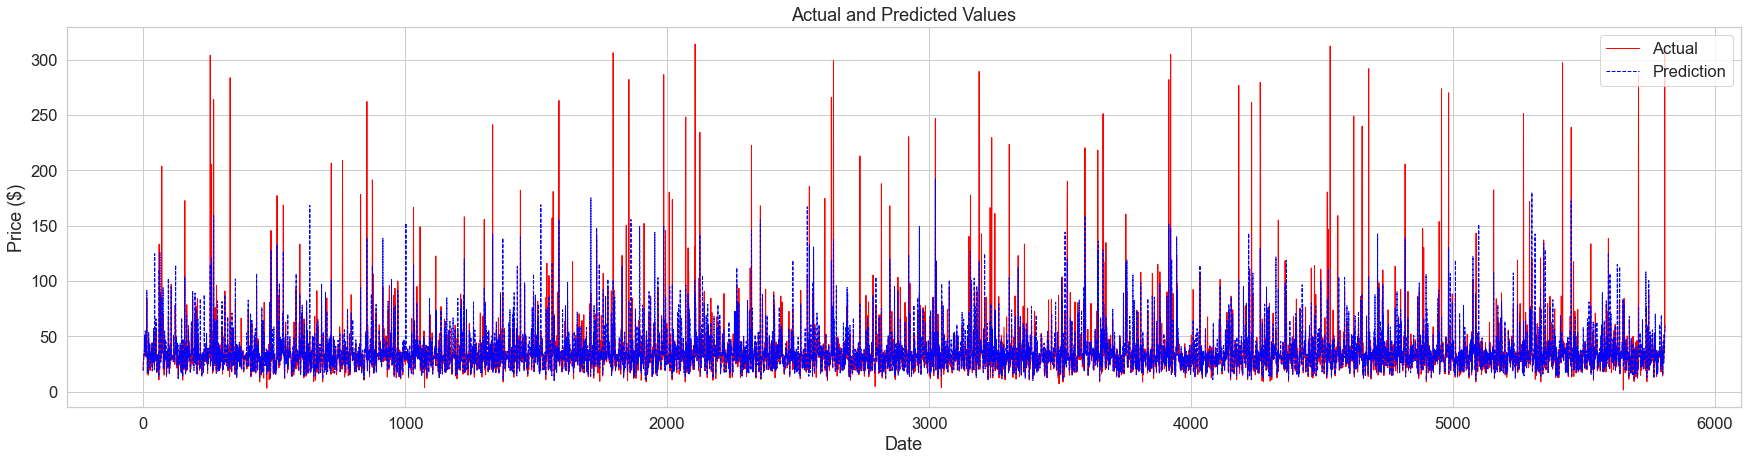

In [80]:
actuals = pd.DataFrame(y_test_npf)
pred = pd.DataFrame(predictions)
pred=pred.rename(columns={0:'ACTUAL_POOL_PRICE'})

pred.reset_index(level=0, inplace=True)
actuals.reset_index(level=0, inplace=True)

pred=pred.drop(['index'],axis=1)
actuals=actuals.drop(['index'],axis=1)

plt.figure(figsize=(30,7))
plt.plot(actuals.ACTUAL_POOL_PRICE, c='red',linewidth=1, label="Actual") 
plt.plot(pred.ACTUAL_POOL_PRICE, c='blue',linestyle='dashed',linewidth=1, label="Prediction")
plt.legend(loc="upper right")
# Graph labels
plt.xlabel('Date'); plt.ylabel('Price ($)'); plt.title('Actual and Predicted Values');

In [81]:
for i,j in dict(zip(x_train_npf.columns, npf_best_model.feature_importances_)).items():
    print(i,':',j)

load : 0.01048802391822401
temp_c : 0.014199224961485608
dew_point_temp_c : 0.009843609658214689
rel_hum_% : 0.011048240367765425
wind_dir_10s_deg : 0.008391298292962125
wind_spd_km_h : 0.00690933143396881
lag_hr_1 : 0.2798186376488421
lag_hr_2 : 0.1108136131431428
lag_hr_3 : 0.08165433599752123
lag_hr_4 : 0.04750596441645832
lag_hr_5 : 0.028556902741252763
lag_hr_6 : 0.018278457834741524
lag_hr_7 : 0.010322347557749082
lag_hr_8 : 0.007351876713164029
lag_hr_9 : 0.006776270972657932
lag_hr_10 : 0.006414250193302326
lag_hr_11 : 0.006296906179199076
lag_hr_12 : 0.0061006410539534124
lag_hr_13 : 0.006863912091419409
lag_hr_14 : 0.006975741923616465
lag_hr_15 : 0.006385091942262256
lag_hr_16 : 0.006370462796741004
lag_hr_17 : 0.008401803402535114
lag_hr_18 : 0.01006200982386982
lag_hr_19 : 0.012051745242356733
lag_hr_20 : 0.016047322669679717
lag_hr_21 : 0.022785272674128165
lag_hr_22 : 0.02502230864593549
lag_hr_23 : 0.03239939344416729
lag_hr_24 : 0.04008897244601587
lag_hr_48 : 0.022980

# Price spikes forecasting 

In [82]:
#working on test train data 
spike_price_data = train_test[train_test.spike_flag == 1] 
spike_price_data.columns

Index(['date_time', 'date', 'hour', 'ACTUAL_POOL_PRICE', 'load', 'date_time1',
       'year', 'month', 'day', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24', 'temp_lag',
       'delta_temp', 'spike_flag'],
      dtype='object')

In [83]:
spike_price_data.shape

(619, 55)

In [84]:
spike_price_data_model = spike_price_data[['load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24',
       'delta_temp']]
x =spike_price_data_model.copy()
y=spike_price_data['ACTUAL_POOL_PRICE']

#standardise the data
from sklearn import preprocessing
names=x.columns
scaler=preprocessing.StandardScaler()
x_s=scaler.fit_transform(x)
x_s=pd.DataFrame(x_s,index=spike_price_data.index,columns=names)

In [85]:
x_train_spf, x_test_spf, y_train_spf, y_test_spf = train_test_split(x,y, test_size=0.20, random_state=42)
print(x_train_spf.shape, x_test_spf.shape, y_train_spf.shape, y_test_spf.shape)

(495, 45) (124, 45) (495,) (124,)


In [86]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 150 decision trees
rf = RandomForestRegressor(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(x_train_spf, y_train_spf);

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [87]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 80, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 26, 32, 38, 44, 50, 56, 62, 68, 74, 80, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [80, 87, 95, 103, 111, 118, 126, 134, 142, 150]}


In [88]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_spf, y_train_spf)

rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.5min finished


{'n_estimators': 111,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 74,
 'bootstrap': True}

In [89]:
def evaluate(model, x_test_spf, y_test_spf):
    predictions_spf = spf_best_model.predict(x_test_spf)
    errors = abs(predictions_spf - y_test_spf)
    mape = 100 * np.mean(errors / y_test_spf)
        
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} $'.format(np.mean(errors)))
    print('Average MAPE: {:0.4f} %'.format(np.mean(mape)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

param_dist = {'n_estimators': 111,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 74,
 'bootstrap': True}

spf_best_model = RandomForestRegressor(**param_dist)
spf_best_model.fit(x_train_spf, y_train_spf)
best_accuracy = evaluate(spf_best_model, x_test_spf, y_test_spf)

Model Performance
Average Error: 101.1313 $
Average MAPE: 16.9281 %
Accuracy = 83.07%.


In [180]:
predictions = spf_best_model.predict(x_test_spf)

In [181]:
#actuals = y_true.set_index(data_for_index)
#predictions = y_pred.set_index(data_for_index)
actuals = pd.DataFrame(y_test_spf)
pred = pd.DataFrame(predictions)
pred=pred.rename(columns={0:'ACTUAL_POOL_PRICE'})

pred.reset_index(level=0, inplace=True)
actuals.reset_index(level=0, inplace=True)

pred=pred.drop(['index'],axis=1)
actuals=actuals.drop(['index'],axis=1)

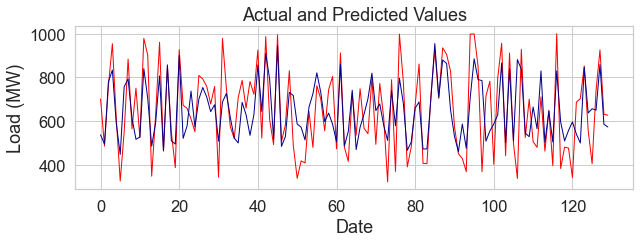

In [232]:
plt.figure(figsize=(10,3))
plt.plot(actuals.ACTUAL_POOL_PRICE, c='red',linewidth=1, label="Actual") 
plt.plot(pred.ACTUAL_POOL_PRICE, c='darkblue',linewidth=1, label="Prediction")
#plt.legend(loc="upper right")
#plt.gridlines('off')
# Graph labels
plt.xlabel('Date'); plt.ylabel('Load (MW)'); plt.title('Actual and Predicted Values');

In [183]:
for i,j in dict(zip(x_train_spf.columns, spf_best_model.feature_importances_)).items():
    print(i,':',j)

load : 0.012196947575601816
temp_c : 0.028165671148219756
dew_point_temp_c : 0.027568069780801507
rel_hum_% : 0.041771606491286556
wind_dir_10s_deg : 0.011949950369441183
wind_spd_km_h : 0.016257200738917343
lag_hr_1 : 0.17378219586304935
lag_hr_2 : 0.08393923259178808
lag_hr_3 : 0.05117482640336248
lag_hr_4 : 0.020939619148281168
lag_hr_5 : 0.012087228777013893
lag_hr_6 : 0.009671248610770568
lag_hr_7 : 0.011157181672976624
lag_hr_8 : 0.012015578436081926
lag_hr_9 : 0.013279206601577755
lag_hr_10 : 0.01614747660370679
lag_hr_11 : 0.013519408363770826
lag_hr_12 : 0.014693095079026955
lag_hr_13 : 0.013828017247941783
lag_hr_14 : 0.01160964974044867
lag_hr_15 : 0.012503729677086453
lag_hr_16 : 0.016710663540910005
lag_hr_17 : 0.012378333055816522
lag_hr_18 : 0.01714666526314056
lag_hr_19 : 0.015887602953208544
lag_hr_20 : 0.028226290965116498
lag_hr_21 : 0.02290585947528725
lag_hr_22 : 0.017338918793378653
lag_hr_23 : 0.012982881710501458
lag_hr_24 : 0.03212733348823561
lag_hr_48 : 0.019

# Data Reconstructor - combining the results 

In [184]:
#defining a spike
val=val.set_index('date_time')
val['lag_hr_1'] = StandardScaler().fit_transform(val['lag_hr_1'].values.reshape(-1, 1))

val_final=val[['lag_hr_1','spike_flag']]

# For testing
y_val = val_final['spike_flag']
X_val = val_final.drop(['spike_flag'], axis=1)
X_val = X_val.values

X_val.shape

(7417, 1)

In [185]:
predictions_val = autoencoder.predict(X_val)
mse = np.mean(np.power(X_val - predictions_val, 2), axis=1)
error_df_val = pd.DataFrame({'reconstruction_error': mse,
                             'true_class': y_val})

#threshold = 0.4

y_pred_val = [1 if e > threshold else 0 for e in error_df_val.reconstruction_error.values]

In [186]:
print("Classification report - \n", classification_report(error_df_val.true_class, y_pred_val))

Classification report - 
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      7276
         1.0       0.51      0.77      0.62       141

    accuracy                           0.98      7417
   macro avg       0.75      0.88      0.80      7417
weighted avg       0.99      0.98      0.98      7417



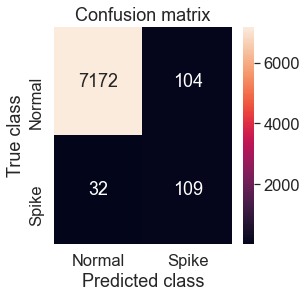

In [187]:
from sklearn.metrics import confusion_matrix
LABELS = ["Normal", "Spike"]                             
conf_matrix = confusion_matrix(error_df_val.true_class, y_pred_val)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True , fmt="d");
                             
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [188]:
error_df_val.head()

,reconstruction_error,true_class
date_time,,
2019-02-16 05:00:00,0.002153,0.0
2018-12-15 02:00:00,0.007597,0.0
2019-09-04 01:00:00,0.010730,0.0
2021-02-04 12:00:00,0.007602,0.0
2019-01-18 13:00:00,0.023921,0.0


In [189]:
y_pred_val_final=pd.DataFrame(y_pred_val)
y_pred_val_final=y_pred_val_final.rename(columns={0: 'pred'})
y_pred_val_final.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [190]:
y_pred_val_final = y_pred_val_final.reset_index()
error_df_val = error_df_val.reset_index()
error_df_val = error_df_val.reset_index()
error_df_val = error_df_val.drop(['reconstruction_error'], axis=1)
error_df_val = pd.merge(error_df_val, y_pred_val_final, on='index', how='left')
error_df_val = error_df_val.drop(['index'], axis=1)
error_df_val = error_df_val.set_index('date_time')
error_df_val.head()
#y_pred_val_final.head()

,true_class,pred
date_time,,
2019-02-16 05:00:00,0.0,0
2018-12-15 02:00:00,0.0,0
2019-09-04 01:00:00,0.0,0
2021-02-04 12:00:00,0.0,0
2019-01-18 13:00:00,0.0,0


In [191]:
npf= error_df_val.loc[(error_df_val['pred']==0)]
spf= error_df_val.loc[(error_df_val['pred']==1)]
print(npf.shape)
print(spf.shape)

(7204, 2)
(213, 2)


Normal price forecasting (npf)

In [192]:
#passing npf data through the NPF model 
x_val_npf = val[[ 'load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24', 
       'delta_temp']]
y_val_npf= val['ACTUAL_POOL_PRICE']

In [193]:
#standardise the data
from sklearn import preprocessing
names=x_val_npf.columns
scaler=preprocessing.StandardScaler()
x_val_npf_s=scaler.fit_transform(x_val_npf)
x_val_npf_s=pd.DataFrame(x_val_npf_s,index=val.index,columns=names)

x_val_npf_s = pd.merge(npf, x_val_npf_s, left_index=True, right_index=True)
y_val_npf = pd.merge(npf, y_val_npf, left_index=True, right_index=True)

y_val_npf = y_val_npf.drop(['true_class','pred'],axis=1)
print(x_val_npf_s.shape, y_val_npf.shape)

(7204, 47) (7204, 1)


In [194]:
x_val_npf_s= x_val_npf_s.drop(['true_class','pred'], axis=1)
print(x_val_npf_s.shape, y_val_npf.shape)

(7204, 45) (7204, 1)


In [195]:
predictions = npf_best_model.predict(x_val_npf_s)
y_hat_npf=pd.DataFrame(predictions)

df_out = x_val_npf_s.reset_index()
df_out["Actual"] = y_val_npf.reset_index()["date_time"]
df_out["Prediction"] = y_hat_npf.reset_index()[0]

y_hat_npf= df_out[['Actual', 'Prediction']]
y_hat_npf=y_hat_npf.rename(columns={'Actual':'date_time'})

y_hat_npf=y_hat_npf.set_index('date_time')
y_hat_npf.head()

,Prediction
date_time,
2019-02-16 05:00:00,35.274061
2018-12-15 02:00:00,30.204074
2019-09-04 01:00:00,28.236360
2021-02-04 12:00:00,43.616847
2019-01-18 13:00:00,50.957938


In [196]:
y_val_npf.head()

,ACTUAL_POOL_PRICE
date_time,
2019-02-16 05:00:00,33.92
2018-12-15 02:00:00,29.98
2019-09-04 01:00:00,28.88
2021-02-04 12:00:00,47.36
2019-01-18 13:00:00,53.51


In [197]:
errors = abs(y_hat_npf['Prediction'] - y_val_npf['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / y_val_npf['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 8 2
Avg Mape: 14.93 %
Accuracy: 85.07 %


In [198]:
prediction_overall= pd.merge(y_hat_npf, y_val_npf, left_index=True, right_index=True)
prediction_overall.shape

(7204, 2)

Spike price forecasting (spf)

In [199]:
val_spf1 = pd.merge(spf, val, left_index=True, right_index=True)

In [200]:
#passing spf data through the NPF model 
x_val_spf = val_spf1[['load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24',
       'delta_temp']]
y_val_spf= val_spf1['ACTUAL_POOL_PRICE']

print(x_val_spf.shape, y_val_spf.shape)

(213, 45) (213,)


In [202]:
predictions_spf = spf_best_model.predict(x_val_spf)
y_hat_spf=pd.DataFrame(predictions_spf)
df_out = x_val_spf.reset_index()
df_out["Actual"] = y_val_spf.reset_index()["date_time"]
df_out["Prediction"] = y_hat_spf.reset_index()[0]

y_hat_spf= df_out[['Actual', 'Prediction']]
y_hat_spf=y_hat_spf.rename(columns={'Actual':'date_time'})
y_hat_spf=y_hat_spf.set_index('date_time')

y_val_spf_final=pd.DataFrame(y_val_spf)

errors = abs(y_hat_spf['Prediction'] - y_val_spf_final['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / y_val_spf_final['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 257 2
Avg Mape: 231.31 %
Accuracy: -131.31 %


In [203]:
prediction_overall_spf= pd.merge(y_hat_spf, y_val_spf_final, left_index=True, right_index=True)
prediction_overall_spf_npf=prediction_overall.append(prediction_overall_spf)

errors = abs(prediction_overall_spf_npf['Prediction'] - prediction_overall_spf_npf['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / prediction_overall_spf_npf['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 15 2
Avg Mape: 21.14 %
Accuracy: 78.86 %


In [208]:
prediction_overall_spf_npf=prediction_overall_spf_npf.reset_index()
prediction_overall_spf_npf=prediction_overall_spf_npf.drop(['date_time'], axis=1)

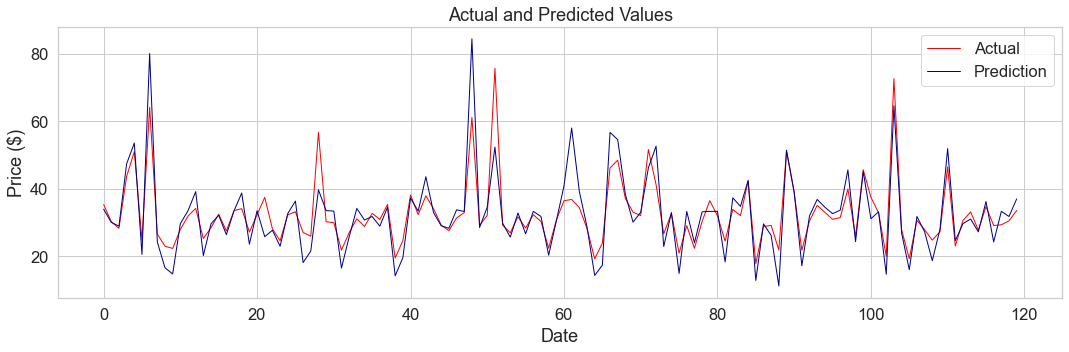

In [246]:
plt.figure(figsize=(18,5))
plt.plot(prediction_overall_spf_npf.Prediction.head(120), c='red',linewidth=1, label="Actual") 
plt.plot(prediction_overall_spf_npf.ACTUAL_POOL_PRICE.head(120), c='darkblue',linewidth=1, label="Prediction")
plt.legend(loc="upper right")
# Graph labels
plt.xlabel('Date'); plt.ylabel('Price ($)'); plt.title('Actual and Predicted Values');

In [247]:
Error=abs(prediction_overall_spf_npf['Prediction'] - prediction_overall_spf_npf['ACTUAL_POOL_PRICE'])
validation = []

for i in range(24, len(Error)-24):
    validation.append(Error[i-24:i])

In [248]:
validation=np.array(validation)
validation=pd.DataFrame(validation)
validation.to_csv('validation.csv', encoding='utf-8')

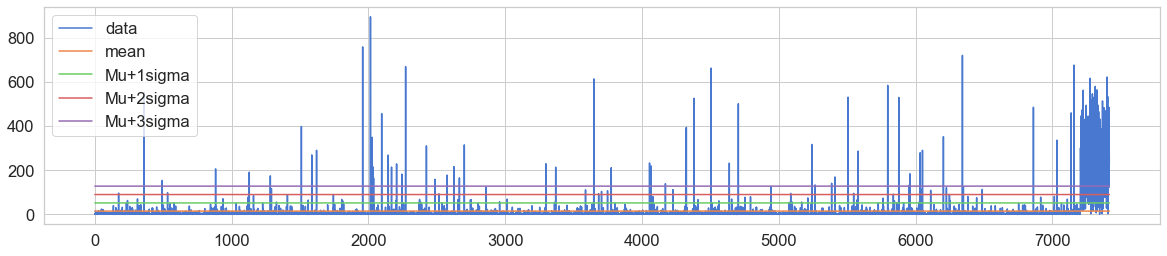

In [262]:
df = pd.DataFrame({
      'data': Error.values.tolist(),
      'mean': [15 for i in range(len(Error))],
      'Mu+1sigma': [52 for i in range(len(Error))],
'Mu+2sigma': [90 for i in range(len(Error))],
'Mu+3sigma': [128 for i in range(len(Error))]})
from pylab import rcParams
rcParams['figure.figsize'] = 20, 4
df.plot()
plt.legend(loc="upper left")
plt.show()

In [149]:
Mape=(abs(prediction_overall_spf_npf['Prediction'] - prediction_overall_spf_npf['ACTUAL_POOL_PRICE']))/ prediction_overall_spf_npf['ACTUAL_POOL_PRICE']
validation_mape = []

for i in range(24, len(Mape)-24):
    validation_mape.append(Mape[i-24:i])

In [150]:
validation_mape=np.array(validation_mape)
validation_mape=pd.DataFrame(validation_mape)
validation_mape.to_csv('validation_mape.csv', encoding='utf-8')

# Validating the results 

Spike Occurence Predictor 

In [183]:
#defining a spike
price_master_data_val=price_master_data_val.set_index('date_time')
price_master_data_val['lag_hr_1'] = StandardScaler().fit_transform(price_master_data_val['lag_hr_1'].values.reshape(-1, 1))

val_final=price_master_data_val[['lag_hr_1','spike_flag']]

# For testing
y_val = val_final['spike_flag']
X_val = val_final.drop(['spike_flag'], axis=1)
X_val = X_val.values

X_val.shape

(264, 1)

In [184]:
predictions_val = autoencoder.predict(X_val)
mse = np.mean(np.power(X_val - predictions_val, 2), axis=1)
error_df_val = pd.DataFrame({'reconstruction_error': mse,
                             'true_class': y_val})

#threshold = 0.4

y_pred_val = [1 if e > threshold else 0 for e in error_df_val.reconstruction_error.values]

print("Classification report - \n", classification_report(error_df_val.true_class, y_pred_val))

Classification report - 
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       255
         1.0       0.21      0.56      0.30         9

    accuracy                           0.91       264
   macro avg       0.60      0.74      0.63       264
weighted avg       0.96      0.91      0.93       264



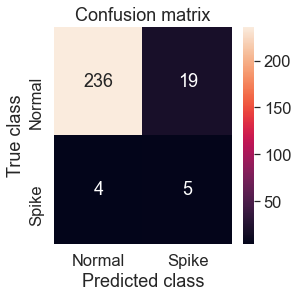

In [185]:
from sklearn.metrics import confusion_matrix
LABELS = ["Normal", "Spike"]                             
conf_matrix = confusion_matrix(error_df_val.true_class, y_pred_val)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True , fmt="d");
                             
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [186]:
y_pred_val_final=pd.DataFrame(y_pred_val)
y_pred_val_final=y_pred_val_final.rename(columns={0: 'pred'})
y_pred_val_final.head()

,pred
0,0
1,0
2,0
3,0
4,0


In [187]:
y_pred_val_final = y_pred_val_final.reset_index()
error_df_val = error_df_val.reset_index()
error_df_val = error_df_val.reset_index()
error_df_val = error_df_val.drop(['reconstruction_error'], axis=1)
error_df_val = pd.merge(error_df_val, y_pred_val_final, on='index', how='left')
error_df_val = error_df_val.drop(['index'], axis=1)
error_df_val = error_df_val.set_index('date_time')
error_df_val.head()
#y_pred_val_final.head()

,true_class,pred
date_time,,
2021-04-10 00:00:00,0.0,0
2021-04-10 01:00:00,0.0,0
2021-04-10 02:00:00,0.0,0
2021-04-10 03:00:00,0.0,0
2021-04-10 04:00:00,0.0,0


In [188]:
npf= error_df_val.loc[(error_df_val['pred']==0)]
spf= error_df_val.loc[(error_df_val['pred']==1)]
print(npf.shape)
print(spf.shape)

(240, 2)
(24, 2)


Normal price forecasting (npf)

In [189]:
#passing npf data through the NPF model 
x_val_npf = price_master_data_val[[ 'load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24', 
       'delta_temp']]
y_val_npf= price_master_data_val['ACTUAL_POOL_PRICE']

In [190]:
#standardise the data
from sklearn import preprocessing
names=x_val_npf.columns
scaler=preprocessing.StandardScaler()
x_val_npf_s=scaler.fit_transform(x_val_npf)
x_val_npf_s=pd.DataFrame(x_val_npf_s,index=price_master_data_val.index,columns=names)

x_val_npf_s = pd.merge(npf, x_val_npf_s, left_index=True, right_index=True)
y_val_npf = pd.merge(npf, y_val_npf, left_index=True, right_index=True)

y_val_npf = y_val_npf.drop(['true_class','pred'],axis=1)
print(x_val_npf_s.shape, y_val_npf.shape)

(240, 47) (240, 1)


In [191]:
x_val_npf_s= x_val_npf_s.drop(['true_class','pred'], axis=1)
print(x_val_npf_s.shape, y_val_npf.shape)

(240, 45) (240, 1)


In [192]:
predictions = npf_best_model.predict(x_val_npf_s)
y_hat_npf=pd.DataFrame(predictions)

df_out = x_val_npf_s.reset_index()
df_out["Actual"] = y_val_npf.reset_index()["date_time"]
df_out["Prediction"] = y_hat_npf.reset_index()[0]

y_hat_npf= df_out[['Actual', 'Prediction']]
y_hat_npf=y_hat_npf.rename(columns={'Actual':'date_time'})

y_hat_npf=y_hat_npf.set_index('date_time')
y_hat_npf.head()

,Prediction
date_time,
2021-04-10 00:00:00,21.036321
2021-04-10 01:00:00,14.315318
2021-04-10 02:00:00,15.103802
2021-04-10 03:00:00,13.024108
2021-04-10 04:00:00,11.840464


In [193]:
y_val_npf.head()

,ACTUAL_POOL_PRICE
date_time,
2021-04-10 00:00:00,42.51
2021-04-10 01:00:00,43.00
2021-04-10 02:00:00,44.75
2021-04-10 03:00:00,46.97
2021-04-10 04:00:00,49.56


In [194]:
errors = abs(y_hat_npf['Prediction'] - y_val_npf['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / y_val_npf['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 44 2
Avg Mape: 52.2 %
Accuracy: 47.8 %


In [195]:
prediction_overall= pd.merge(y_hat_npf, y_val_npf, left_index=True, right_index=True)
prediction_overall.shape

(240, 2)

Spike price forecasting (spf)

In [196]:
val_spf1 = pd.merge(spf, price_master_data_val, left_index=True, right_index=True)

In [197]:
#passing spf data through the NPF model 
x_val_spf = val_spf1[['load', 'temp_c', 'dew_point_temp_c', 'rel_hum_%',
       'wind_dir_10s_deg', 'wind_spd_km_h', 'lag_hr_1', 'lag_hr_2', 'lag_hr_3',
       'lag_hr_4', 'lag_hr_5', 'lag_hr_6', 'lag_hr_7', 'lag_hr_8', 'lag_hr_9',
       'lag_hr_10', 'lag_hr_11', 'lag_hr_12', 'lag_hr_13', 'lag_hr_14',
       'lag_hr_15', 'lag_hr_16', 'lag_hr_17', 'lag_hr_18', 'lag_hr_19',
       'lag_hr_20', 'lag_hr_21', 'lag_hr_22', 'lag_hr_23', 'lag_hr_24',
       'lag_hr_48', 'lag_hr_72', 'lag_hr_96', 'lag_hr_120', 'lag_hr_144',
       'lag_hr_168', 'lag_l_24', 'lag_l_48', 'lag_l_72', 'lag_l_96',
       'lag_l_120', 'lag_l_144', 'lag_l_168', 'lag_t_24',
       'delta_temp']]
y_val_spf= val_spf1['ACTUAL_POOL_PRICE']

print(x_val_spf.shape, y_val_spf.shape)

(24, 45) (24,)


In [198]:
#standardise the data
#from sklearn import preprocessing
#names=x_val_spf.columns
#scaler=preprocessing.StandardScaler()
#x_val_spf_s=scaler.fit_transform(x_val_spf)
#x_val_spf_s=pd.DataFrame(x_val_spf_s,index=val_spf1.index,columns=names)

#pass val data through the model
predictions_spf = spf_best_model.predict(x_val_spf)
y_hat_spf=pd.DataFrame(predictions_spf)
df_out = x_val_spf.reset_index()
df_out["Actual"] = y_val_spf.reset_index()["date_time"]
df_out["Prediction"] = y_hat_spf.reset_index()[0]

y_hat_spf= df_out[['Actual', 'Prediction']]
y_hat_spf=y_hat_spf.rename(columns={'Actual':'date_time'})
y_hat_spf=y_hat_spf.set_index('date_time')

y_val_spf_final=pd.DataFrame(y_val_spf)

errors = abs(y_hat_spf['Prediction'] - y_val_spf_final['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / y_val_spf_final['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 337 2
Avg Mape: 229.36 %
Accuracy: -129.36 %


In [199]:
prediction_overall_spf= pd.merge(y_hat_spf, y_val_spf_final, left_index=True, right_index=True)
prediction_overall_spf_npf=prediction_overall.append(prediction_overall_spf)

errors = abs(prediction_overall_spf_npf['Prediction'] - prediction_overall_spf_npf['ACTUAL_POOL_PRICE'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / prediction_overall_spf_npf['ACTUAL_POOL_PRICE']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 71 2
Avg Mape: 68.31 %
Accuracy: 31.69 %


# AESO Validation data

In [212]:
aeso_val=pd.read_excel('aeso_price_val_data.xlsx')
train_test_ratio = 0.20
val_ratio = 0.80
# train and validation set is now 90% of the entire data set
aeso_train_test, aeso_val  = train_test_split(aeso_val, test_size=1 - train_test_ratio)

In [213]:
aeso_train_test.columns

Index(['Date (HE)', 'Forecast Pool Price', 'Actual Posted Pool Price'], dtype='object')

In [214]:
errors = abs(aeso_train_test['Forecast Pool Price'] - aeso_train_test['Actual Posted Pool Price'])
print('Mean Absolute Error:', '$',round(np.mean(errors)), 2) # Print out the mean absolute error (mae)
mape = 100 * (errors / aeso_train_test['Actual Posted Pool Price']) # Calculate mean absolute percentage error (MAPE)
print('Avg Mape:', round(np.mean(mape), 2), '%')
accuracy = 100 - np.mean(mape) # Calculate and display accuracy
print('Accuracy:', round(accuracy, 2), '%')

Mean Absolute Error: $ 33 2
Avg Mape: 24.55 %
Accuracy: 75.45 %
